In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
# import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
current_path = os.getcwd()
current_path = os.getcwd()
genre_music_path = os.path.join(current_path, 'genres_original')
class_xls_path = os.path.join(current_path, 'class_xls')

In [3]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [5]:
def GetGenre(genre_music_path):
    label_names = [item for item in os.listdir(
        genre_music_path) if os.path.isdir(os.path.join(genre_music_path, item))]
    nb_train_samples = sum([len(files) for _, _, files in os.walk(genre_music_path)])
    
    return label_names, nb_train_samples

In [6]:
def FileCheck(fn):
    try:
      librosa.load(fn, mono=True, duration=30)
      return 1
    except:
      print ("Error: File does not appear to exist.")
      return 0

In [7]:
result = FileCheck('d:\\testRGB\\MusicClasiffication\\genres_original/jazz/jazz.00054.wav')
result

Error: File does not appear to exist.


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


0

In [8]:
def GetFeature(songname, g,filename):
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    return to_append

In [9]:
genres, nb_train_samples = GetGenre(genre_music_path)


In [43]:
# file = open(os.path.join(class_xls_path,'data1.csv'), 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# genres, nb_train_samples = GetGenre(genre_music_path)
# for g in genres:
#     for filename in os.listdir('{0}/{1}'.format(genre_music_path, g)):
#         songname = '{0}/{1}/{2}'.format(genre_music_path, g,filename)
#         if FileCheck(songname)!=1:
#             continue
#         to_append = GetFeature(songname, g,filename)
#         file = open(os.path.join(class_xls_path,'data1.csv'), 'a', newline='')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(to_append.split())

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error: File does not appear to exist.


In [22]:
# file = open(os.path.join(class_xls_path,'data.csv'), 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# # genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
# genres, nb_train_samples = GetGenre(genre_music_path)
# for g in genres:
#     for filename in os.listdir('{0}/{1}'.format(genre_music_path, g)):
#         songname = '{0}/{1}/{2}'.format(genre_music_path, g,filename)
#         if FileCheck(songname)!=1:
#             continue
#         y, sr = librosa.load(songname, mono=True, duration=30)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr)
#         to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
#         to_append += f' {g}'
#         file = open(os.path.join(class_xls_path,'data.csv'), 'a', newline='')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(to_append.split())
  

Error: File does not appear to exist.


In [10]:
# https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0
# https://mikesmales.medium.com/sound-classification-using-deep-learning-8bc2aa1990b7
data = pd.read_csv(os.path.join(class_xls_path,'data1.csv'))
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.331918,0.133103,1709.695245,1933.811072,3576.578906,0.078156,-118.268349,127.116753,-24.681812,41.799294,...,10.168422,-4.158367,8.331047,-7.012330,-2.845743,-3.214174,0.411830,-5.189313,-0.428244,blues
1,0.341341,0.113380,1862.152169,2044.363474,3963.745898,0.089531,-123.148346,121.959778,-19.781145,48.184265,...,8.587708,-8.416450,8.305593,-9.405838,3.518512,-6.563415,0.740047,-2.516605,6.000895,blues
2,0.347273,0.124936,1819.031220,2085.854586,4025.158594,0.074934,-135.994675,112.865311,-16.472897,52.731213,...,11.439560,-5.390603,6.231468,-1.620920,4.989518,-1.700381,2.621530,-2.606426,2.352135,blues
3,0.367662,0.128023,1690.639848,2000.887093,3705.347461,0.069262,-121.603172,128.105408,-16.039820,39.561691,...,9.475163,-2.772447,9.347610,-9.093128,-1.430501,-3.136297,-0.069073,-2.403810,3.597623,blues
4,0.333540,0.147225,1647.168975,1988.534249,3530.497852,0.069543,-105.007431,133.192474,-16.976141,40.493385,...,16.184778,-6.603631,6.055697,-8.496324,0.978470,-0.993938,1.825108,-3.346776,0.519681,blues


In [11]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y.shape)

(9990,)


Normalizing the dataset

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [13]:
X.shape

(9990, 26)

In [14]:
print(len(X[0]))

26


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Creating a Model

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7992, 26) (1998, 26) (7992,) (1998,)


In [37]:
# from keras import models
# from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [38]:
model.compile(
            # optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [39]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128)

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 1.5890 - accuracy: 0.4411 - val_loss: 1.2366 - val_accuracy: 0.5541
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 1.1145 - accuracy: 0.6196 - val_loss: 1.0218 - val_accuracy: 0.6446
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.9481 - accuracy: 0.6754 - val_loss: 0.8998 - val_accuracy: 0.6962
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.8390 - accuracy: 0.7100 - val_loss: 0.8579 - val_accuracy: 0.7002
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.7509 - accuracy: 0.7455 - val_loss: 0.7614 - val_accuracy: 0.7377
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.7703 - val_loss: 0.7085 - val_accuracy: 0.7482
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.7954 - val_loss: 0.6701 - val_accuracy: 0.7708
Epoch 8/20
63/63 [==

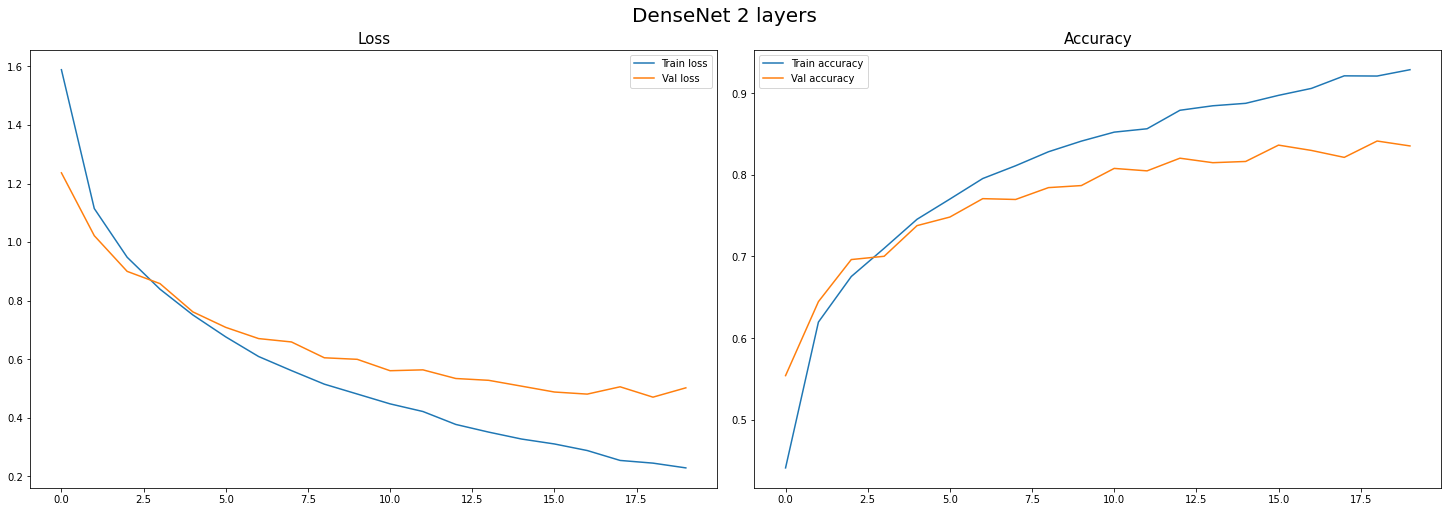

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7), constrained_layout=True)

ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Val loss')
ax[1].plot(history.history['accuracy'], label='Train accuracy')
ax[1].plot(history.history['val_accuracy'], label='Val accuracy')

fig.suptitle(f'DenseNet 2 layers', fontsize=20)
ax[0].set_title(f'Loss', fontsize=15)
ax[1].set_title(f'Accuracy', fontsize=15)

ax[0].legend()
ax[1].legend()

In [41]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8353
test_acc:  0.8353353142738342


In [42]:
genres, nb_train_samples = GetGenre(genre_music_path)

In [43]:
predictions = model.predict(X_test)
genres[np.argmax(predictions[0])]

'blues'

In [44]:
X_test.shape

(1998, 26)

In [45]:
predictions = model.predict(X_test)
genres[np.argmax(predictions[1])]

'jazz'

In [46]:
# Sampling rate.
sr = 22050

# Let's make sure all files have the same amount of samples and pick a duration right under 30 seconds.
TOTAL_SAMPLES = 29 * sr

# The dataset contains 999 files. Lets make it bigger. 
# X amount of slices => X times more training examples.
NUM_SLICES = 10
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)



In [47]:
def GetFeature_pre(songname, g,filename):
    y, sr = librosa.load(songname, mono=True, duration=30)
    TOTAL_SAMPLES = 29 * sr
    NUM_SLICES = 10
    SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)
    print(SAMPLES_PER_SLICE)
    y=y[0:SAMPLES_PER_SLICE]
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    return to_append

In [48]:
songname_pre = 'blues.00043.wav'
trypre = GetFeature_pre(songname_pre, '_',songname_pre).split()
trypre = trypre[1:-1]
print(trypre)
# trypre = scaler.fit_transform(np.array(trypre, dtype = float).reshape(1, -1))
trypre = np.array(trypre, dtype = float)
trypre = np.expand_dims(trypre, axis=0)
print(trypre)
# trypre


63945
['0.3980572819709778', '0.12854091823101044', '2174.849300099218', '2354.7072592817476', '4982.094140625', '0.08960546875', '-103.30793762207031', '102.05876159667969', '-10.18349552154541', '44.32889175415039', '-11.383622169494629', '37.420921325683594', '-5.407376289367676', '29.976638793945312', '-18.812591552734375', '10.101991653442383', '-24.077308654785156', '6.638007640838623', '-9.148433685302734', '5.2578864097595215', '-15.447012901306152', '1.9959747791290283', '-7.9035420417785645', '2.8280794620513916', '-3.9268064498901367', '4.275541305541992']
[[ 3.98057282e-01  1.28540918e-01  2.17484930e+03  2.35470726e+03
   4.98209414e+03  8.96054688e-02 -1.03307938e+02  1.02058762e+02
  -1.01834955e+01  4.43288918e+01 -1.13836222e+01  3.74209213e+01
  -5.40737629e+00  2.99766388e+01 -1.88125916e+01  1.01019917e+01
  -2.40773087e+01  6.63800764e+00 -9.14843369e+00  5.25788641e+00
  -1.54470129e+01  1.99597478e+00 -7.90354204e+00  2.82807946e+00
  -3.92680645e+00  4.27554131e

In [49]:
prediction = model.predict(trypre)

pre= (model.predict(trypre) > 0.5).astype("int32")

print(genres[np.argmax(prediction)])

disco
